In [4]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats


In [2]:
batches = ['a','c','e', 'f']#, 'k', 'n']
df = pd.DataFrame()

dataset = 'CIFAR10'

for letter in batches:
    filename = '../../outputs/'+dataset+'/'+letter+'_22-05-21_e12_'+dataset+'.csv'
    df_partial = pd.read_csv(filename)
    #df_partial = df_partial[~df_partial.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs
    df = pd.concat([df, df_partial], ignore_index=True)
print(df.shape)

(13511, 31)


In [5]:
over_90 = df[df.test_acc > 0]
print(over_90.shape)
print(over_90.columns)

(13511, 31)
Index(['model_num', 'test_acc', 'test_loss', 'train_acc', 'train_loss',
       'g_gap', 'mqBE_L1', 'mqBE_L2', 'mqBE_L3', 'mqBE_L4', 'mqBE_L5',
       'mqAE_L1', 'mqAE_L2', 'mqAE_L3', 'mqAE_L4', 'mqAE_L5', 'erBE_L1',
       'erBE_L2', 'erBE_L3', 'erBE_L4', 'erBE_L5', 'erAE_L1', 'erAE_L2',
       'erAE_L3', 'erAE_L4', 'erAE_L5', 'rAE_L1', 'rAE_L2', 'rAE_L3', 'rAE_L4',
       'rAE_L5'],
      dtype='object')


In [6]:
cols = ['mqBE_L1', 'mqBE_L2', 'mqBE_L3', 'mqBE_L4', 'mqBE_L5',
        'mqAE_L1', 'mqAE_L2', 'mqAE_L3', 'mqAE_L4', 'mqAE_L5', 
        'erBE_L1', 'erBE_L2', 'erBE_L3', 'erBE_L4', 'erBE_L5', 
        'erAE_L1', 'erAE_L2', 'erAE_L3', 'erAE_L4', 'erAE_L5']
test_acc_vec = over_90['test_acc']
train_acc_vec = over_90['train_acc']
gap = train_acc_vec - test_acc_vec
results = {}
results2 = {}

for x in cols:
    col = over_90[x]
    vec = col.to_numpy()
    results[x + "_test"] = abs(stats.pearsonr(vec, test_acc_vec)[0])
    results[x + "_train"] = abs(stats.pearsonr(vec, train_acc_vec)[0])
    results[x + "_gap"] = abs(stats.pearsonr(vec, gap)[0])

    results2[x + "_test"] = abs(stats.spearmanr(vec, test_acc_vec)[0])
    results2[x + "_train"] = abs(stats.spearmanr(vec, train_acc_vec)[0])
    results2[x + "_gap"] = abs(stats.spearmanr(vec, gap)[0])
    

In [32]:
sorted_values = sorted(results.values()) # Sort the values
sorted_values.reverse()
sorted_dict = {}

for i in sorted_values:
    for k in results.keys():
        if results[k] == i:
            sorted_dict[k] = abs(results[k])
            break

sorted_values = sorted(results2.values()) # Sort the values
sorted_values.reverse()
sorted_dict2 = {}
for i in sorted_values:
    for k in results2.keys():
        if results2[k] == i:
            sorted_dict2[k] = abs(results2[k])
            break

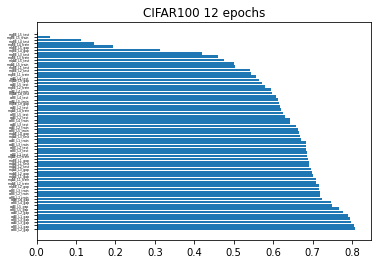

In [33]:
if('12' in filename):
    title = dataset + ' 12 epochs'
else:
    title = dataset + ' 90 epochs'


SMALL_SIZE = 2
#matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('ytick', labelsize=3)
matplotlib.rc('xtick', labelsize=10)

plt.barh(range(len(sorted_dict)), list(sorted_dict.values()), align='center');
plt.yticks(range(len(sorted_dict)), list(sorted_dict.keys()),rotation='horizontal');
plt.title(title);

In [23]:
import operator
print(max(results, key=results.get), results[max(results, key=results.get)])
print(max(results2, key=results2.get), results2[max(results2, key=results2.get)])

erBE_L5_gap 0.9241307904764975
erBE_L5_gap 0.923396340511229


In [10]:
accuracy = "g_gap" #"train", "test"
x_axis = 'erBE_L5'

xp = np.linspace(min(over_90[x_axis]), max(over_90[x_axis]), 100)
p3 = np.poly1d(np.polyfit(over_90[x_axis], over_90[accuracy+'_acc'], 3))

matplotlib.rc('xtick', labelsize=10)
plt.plot(over_90[x_axis] , over_90[accuracy+'_acc'],
'.', xp, p3(xp),'--')
plt.xlabel(x_axis)
plt.ylabel(accuracy + " accuracy")
plt.title("Pearson: " + str(results[x_axis+'_'+accuracy]))
#plt.ylim([0,1.1])
print("Pearson: ",results[x_axis+'_'+accuracy])
print("Spearman:", results2[x_axis+'_'+accuracy])

KeyError: 'g_gap_acc'

Pearson:  -0.9241307904764978
Pearson:  0.9457496031391246
Spearman: -0.9144220525945205


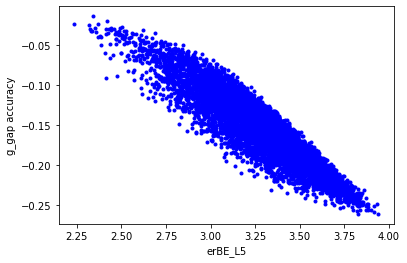

In [25]:
matplotlib.rc('xtick', labelsize=10)
plt.plot(over_90['erBE_L2'] , over_90['g_gap'], '.', color='blue')#over_90[accuracy+'_acc']
plt.xlabel(x_axis)
plt.ylabel(accuracy + " accuracy")
#plt.ylim([0,1.1])
print("Pearson: ", stats.pearsonr(over_90['erBE_L5'] , over_90['g_gap'])[0])
print("Pearson: ", stats.pearsonr(over_90['train_acc'] , over_90['test_acc'])[0])
print("Spearman:", stats.pearsonr(over_90['train_acc'] , over_90['g_gap'])[0])

In [26]:
# Temp Test for 12 epochs
filename = '../../outputs/a_5-20-2021_12.csv'
df = pd.read_csv(filename)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs
print(df)

     model_num  test_acc  test_loss  train_acc  train_loss    g_gap   mqBE_L1  \
1        10000   0.84940   0.454937    0.87338    0.372544 -0.02398  0.600811   
6        10056   0.84415   0.460370    0.87343    0.366907 -0.02928  0.607176   
9        10117   0.85525   0.430457    0.88062    0.349655 -0.02537  0.605112   
10       10128   0.84950   0.451064    0.87749    0.358977 -0.02799  0.581047   
14       10294   0.85100   0.436559    0.87949    0.352832 -0.02849  0.581101   
..         ...       ...        ...        ...         ...      ...       ...   
708      18627   0.84765   0.450870    0.88205    0.349151 -0.03440  0.601569   
709      18648   0.85145   0.448171    0.87997    0.353294 -0.02852  0.561350   
743      18945   0.82400   0.511352    0.84773    0.442932 -0.02373  0.642576   
744      18949   0.84590   0.446892    0.87257    0.372236 -0.02667  0.617446   
745      18971   0.84950   0.445915    0.87497    0.365176 -0.02547  0.580211   

      mqBE_L2   mqBE_L3   m

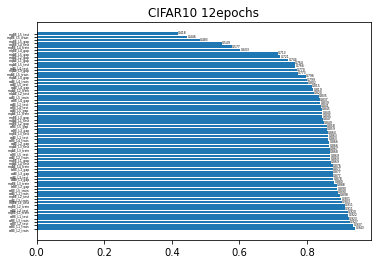

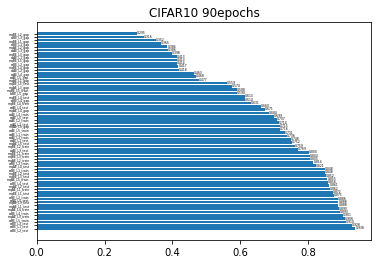

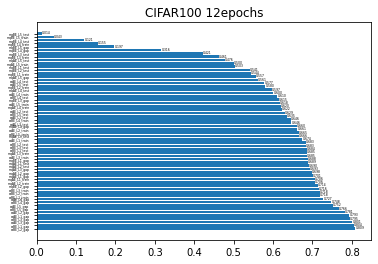

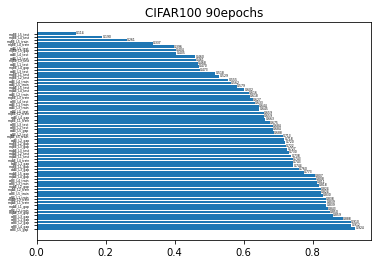

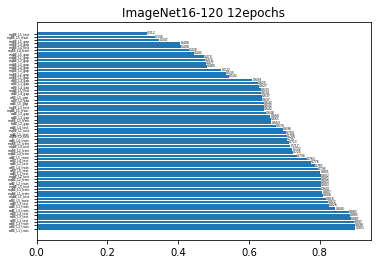

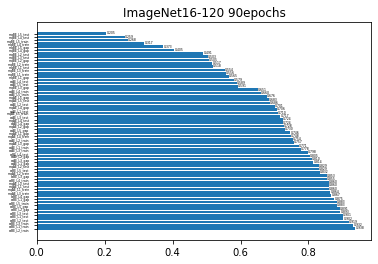

In [69]:
# Plotting all files into bar graphs.
# Should have 6 bar graphs total.

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats


datasets = ['CIFAR10','CIFAR100','ImageNet16-120']
epochs = ['12', '90']
batches = ['a','c','e', 'f'] #Batch f is more than just f, its like 3 sets in one.

cols = ['mqBE_L1', 'mqBE_L2', 'mqBE_L3', 'mqBE_L4', 'mqBE_L5',
        'mqAE_L1', 'mqAE_L2', 'mqAE_L3', 'mqAE_L4', 'mqAE_L5', 
        'erBE_L1', 'erBE_L2', 'erBE_L3', 'erBE_L4', 'erBE_L5', 
        'erAE_L1', 'erAE_L2', 'erAE_L3', 'erAE_L4', 'erAE_L5']

df = pd.DataFrame()

for d in datasets:
    for e in epochs:
        df = pd.DataFrame()
        for letter in batches:
            filename = '../../outputs/'+d+'/'+letter+'_22-05-21_e'+e+'_'+d+'.csv'
            df_partial = pd.read_csv(filename)
            #df_partial = df_partial[~df_partial.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs
            df = pd.concat([df, df_partial], ignore_index=True)
        
        test_acc_vec = df['test_acc']
        train_acc_vec = df['train_acc']
        gap = train_acc_vec - test_acc_vec
        results = {}
        results2 = {}

        for x in cols:
            col = df[x]
            vec = col.to_numpy()
            results[x + "_test"] = abs(stats.pearsonr(vec, test_acc_vec)[0])
            results[x + "_train"] = abs(stats.pearsonr(vec, train_acc_vec)[0])
            results[x + "_gap"] = abs(stats.pearsonr(vec, gap)[0])
        
        sorted_values = sorted(results.values()) # Sort the values
        sorted_values.reverse()
        sorted_dict = {}

        for i in sorted_values:
            for k in results.keys():
                if results[k] == i:
                    sorted_dict[k] = abs(results[k])
                    break

        #matplotlib.rc('font', size=SMALL_SIZE)
        matplotlib.rc('ytick', labelsize=3)
        matplotlib.rc('xtick', labelsize=10)

        plt.barh(range(len(sorted_dict)), list(sorted_dict.values()), align='center');
        plt.yticks(range(len(sorted_dict)), list(sorted_dict.keys()),rotation='horizontal');
        plt.title(d + ' ' + e + 'epochs');

        for index, value in enumerate(list(sorted_dict.values())):
            plt.text(value, index, str(value)[0:5], fontsize = 3)

        plt.show()

In [9]:
#Making a table of format table.docx

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

#Making Dataframe 
table = pd.DataFrame(index = ['${{Q}_{G}^{L1}}$', '${{Q}_{G}^{L2}}$', '${{Q}_{G}^{L3}}$', '${{Q}_{G}^{L4}}$', '${{Q}_{G}^{L5}}$',
                              '${\widehat{Q}_{ER}^{L1}}$', '${\widehat{Q}_{ER}^{L2}}$', '${\widehat{Q}_{ER}^{L3}}$', '${\widehat{Q}_{ER}^{L4}}$', '${\widehat{Q}_{ER}^{L5}}$', 
                              '${Q_{ER}^{L1}}$', '${Q_{ER}^{L2}}$', '${Q_{ER}^{L3}}$', '${Q_{ER}^{L4}}$', '${Q_{ER}^{L5}}$', 
                              '${\widehat{Q}_{ER}^{L1}}$', '${\widehat{Q}_{ER}^{L2}}$', '${\widehat{Q}_{ER}^{L3}}$', '${\widehat{Q}_{ER}^{L4}}$', '${\widehat{Q}_{ER}^{L5}}$'],
                    columns = ['CIFAR10_e12_Test', 'CIFAR10_e12_Gap', 'CIFAR10_e90_Test', 'CIFAR10_e90_Gap', 
                               'CIFAR100_e12_Test', 'CIFAR100_e12_Gap', 'CIFAR100_e90_Test', 'CIFAR100_e90_Gap',
                               'ImageNet16-120_e12_Test', 'ImageNet16-120_e12_Gap', 'ImageNet16-120_e90_Test', 'ImageNet16-120_e90_Gap'])


print(table.index)

results = {}

datasets = ['CIFAR10','CIFAR100','ImageNet16-120']
epochs = ['12', '90']
batches = ['a','c','e', 'f'] #Batch f is more than just f, its like 3 sets in one.

cols = ['mqBE_L1', 'mqBE_L2', 'mqBE_L3', 'mqBE_L4', 'mqBE_L5',
        'mqAE_L1', 'mqAE_L2', 'mqAE_L3', 'mqAE_L4', 'mqAE_L5', 
        'erBE_L1', 'erBE_L2', 'erBE_L3', 'erBE_L4', 'erBE_L5', 
        'erAE_L1', 'erAE_L2', 'erAE_L3', 'erAE_L4', 'erAE_L5']

index = ['${{Q}_{G}^{L1}}$', '${{Q}_{G}^{L2}}$', '${{Q}_{G}^{L3}}$',
       '${{Q}_{G}^{L4}}$', '${{Q}_{G}^{L5}}$', '${\widehat{Q}_{ER}^{L1}}$',
       '${\widehat{Q}_{ER}^{L2}}$', '${\widehat{Q}_{ER}^{L3}}$',
       '${\widehat{Q}_{ER}^{L4}}$', '${\widehat{Q}_{ER}^{L5}}$',
       '${Q_{ER}^{L1}}$', '${Q_{ER}^{L2}}$', '${Q_{ER}^{L3}}$',
       '${Q_{ER}^{L4}}$', '${Q_{ER}^{L5}}$', '${\widehat{Q}_{ER}^{L1}}$',
       '${\widehat{Q}_{ER}^{L2}}$', '${\widehat{Q}_{ER}^{L3}}$',
       '${\widehat{Q}_{ER}^{L4}}$', '${\widehat{Q}_{ER}^{L5}}$']

df = pd.DataFrame()

#e = '12'
#d = 'CIFAR10'
for d in datasets:
    for e in epochs:
        df = pd.DataFrame()
        for letter in batches:
            filename = '../../outputs/'+d+'/'+letter+'_22-05-21_e'+e+'_'+d+'.csv'
            df_partial = pd.read_csv(filename)
            #df_partial = df_partial[~df_partial.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs
            df = pd.concat([df, df_partial], ignore_index=True)

        test_acc_vec = df['test_acc']
        train_acc_vec = df['train_acc']
        gap = train_acc_vec - test_acc_vec


        for x in cols:
            col = df[x]
            vec = col.to_numpy()
            results[x + "_test"] = abs(stats.pearsonr(vec, test_acc_vec)[0])
            results[x + "_train"] = abs(stats.pearsonr(vec, train_acc_vec)[0])
            results[x + "_gap"] = abs(stats.pearsonr(vec, gap)[0])

        #Parse for x and y index
        x = d + "_e" + e
        for y in index:
            #Getting Index:
            if('{G}' in y):
                ind = 'mq'
            else:
                ind = 'er'
            if('widehat' in y):
                ind += 'AE'
            else:
                ind += "BE"
            if('L1' in  y):
                ind += '_L1'
            elif('L2' in  y):
                ind += '_L2'
            elif('L3' in  y):
                ind += '_L3'
            elif('L4' in  y):
                ind += '_L4'
            elif('L5' in  y):
                ind += '_L5'


            table.loc[y, x + '_Test'] = results[ind + '_test']
            table.loc[y, x + '_Gap'] = results[ind + '_gap']

Index(['${{Q}_{G}^{L1}}$', '${{Q}_{G}^{L2}}$', '${{Q}_{G}^{L3}}$',
       '${{Q}_{G}^{L4}}$', '${{Q}_{G}^{L5}}$', '${\widehat{Q}_{ER}^{L1}}$',
       '${\widehat{Q}_{ER}^{L2}}$', '${\widehat{Q}_{ER}^{L3}}$',
       '${\widehat{Q}_{ER}^{L4}}$', '${\widehat{Q}_{ER}^{L5}}$',
       '${Q_{ER}^{L1}}$', '${Q_{ER}^{L2}}$', '${Q_{ER}^{L3}}$',
       '${Q_{ER}^{L4}}$', '${Q_{ER}^{L5}}$', '${\widehat{Q}_{ER}^{L1}}$',
       '${\widehat{Q}_{ER}^{L2}}$', '${\widehat{Q}_{ER}^{L3}}$',
       '${\widehat{Q}_{ER}^{L4}}$', '${\widehat{Q}_{ER}^{L5}}$'],
      dtype='object')


In [10]:
table
#print(table.to_latex(index=True, escape = False))

,CIFAR10_e12_Test,CIFAR10_e12_Gap,CIFAR10_e90_Test,CIFAR10_e90_Gap,CIFAR100_e12_Test,CIFAR100_e12_Gap,CIFAR100_e90_Test,CIFAR100_e90_Gap,ImageNet16-120_e12_Test,ImageNet16-120_e12_Gap,ImageNet16-120_e90_Test,ImageNet16-120_e90_Gap
${{Q}_{G}^{L1}}$,0.90367,0.869629,0.872976,0.352275,0.503455,0.688532,0.51837,0.744488,0.696103,0.542847,0.518507,0.565775
${{Q}_{G}^{L2}}$,0.898265,0.849838,0.848942,0.295399,0.54114,0.714605,0.529802,0.720922,0.706781,0.535714,0.491042,0.505995
${{Q}_{G}^{L3}}$,0.860882,0.845855,0.852862,0.398571,0.421692,0.61542,0.461148,0.722357,0.642451,0.522336,0.503872,0.591835
${{Q}_{G}^{L4}}$,0.549332,0.603178,0.613538,0.417852,0.121289,0.316767,0.190565,0.47011,0.408194,0.406454,0.259066,0.405085
${{Q}_{G}^{L5}}$,0.418833,0.483927,0.559587,0.413455,0.014179,0.197234,0.114688,0.404546,0.312552,0.347218,0.205063,0.373174
${\widehat{Q}_{ER}^{L1}}$,0.863466,0.878059,0.748455,0.413316,0.635041,0.793817,0.468013,0.743537,0.801776,0.66044,0.706727,0.814398
${\widehat{Q}_{ER}^{L2}}$,0.839522,0.866064,0.714347,0.418602,0.622879,0.781299,0.460395,0.718111,0.77624,0.663559,0.686414,0.805003
${\widehat{Q}_{ER}^{L3}}$,0.877554,0.87747,0.769429,0.386708,0.64664,0.801576,0.473619,0.760805,0.822478,0.648111,0.717054,0.810533
${\widehat{Q}_{ER}^{L4}}$,0.766062,0.815422,0.66007,0.463364,0.561888,0.727705,0.405349,0.659732,0.676081,0.634527,0.579842,0.724776
${\widehat{Q}_{ER}^{L5}}$,0.80283,0.845049,0.699674,0.468763,0.577686,0.752541,0.396968,0.684885,0.704622,0.642108,0.589481,0.730867


In [25]:
# Creating Grouped Bar Graphs
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
datasets = ['CIFAR10', 'CIFAR100','ImageNet16-120']

cols = ['mqBE_L1', 'mqBE_L2', 'mqBE_L3', 'mqBE_L4', 'mqBE_L5',
        'mqAE_L1', 'mqAE_L2', 'mqAE_L3', 'mqAE_L4', 'mqAE_L5', 
        'erBE_L1', 'erBE_L2', 'erBE_L3', 'erBE_L4', 'erBE_L5', 
        'erAE_L1', 'erAE_L2', 'erAE_L3', 'erAE_L4', 'erAE_L5']

df = pd.DataFrame()
results = {}

for d in datasets:
    for e in epochs:
        df = pd.DataFrame()
        for letter in batches:
            filename = '../../outputs/'+d+'/'+letter+'_22-05-21_e'+e+'_'+d+'.csv'
            df_partial = pd.read_csv(filename)
            #df_partial = df_partial[~df_partial.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs
            df = pd.concat([df, df_partial], ignore_index=True)

        test_acc_vec = df['test_acc']
        train_acc_vec = df['train_acc']
        gap = train_acc_vec - test_acc_vec


        for x in cols:
            col = df[x]
            vec = col.to_numpy()
            results[x + "_test"  + "_" + d + "_" + e] = abs(stats.pearsonr(vec, test_acc_vec)[0])
            results[x + "_train" + "_" + d + "_" + e] = abs(stats.pearsonr(vec, train_acc_vec)[0])
            results[x + "_gap"   + "_" + d + "_" + e] = abs(stats.pearsonr(vec, gap)[0])

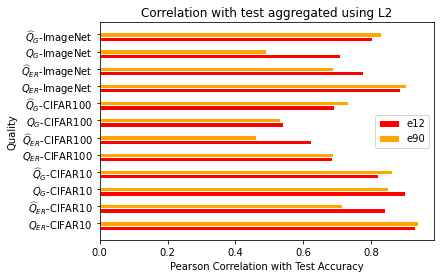

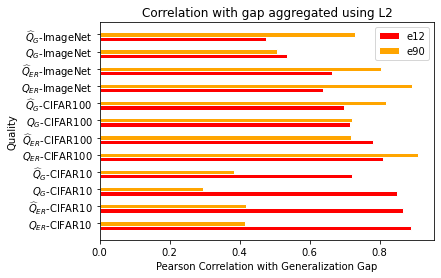

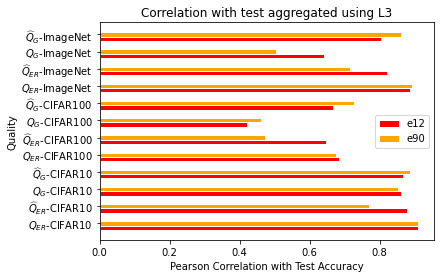

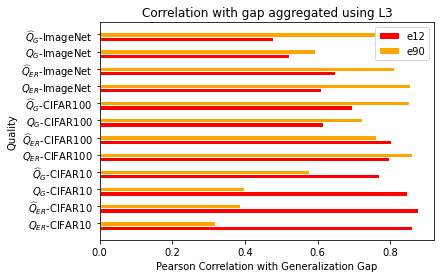

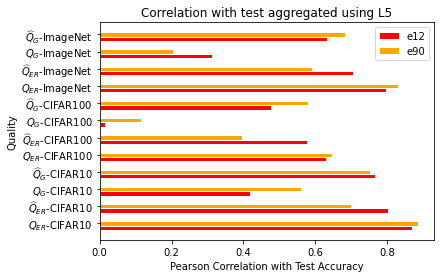

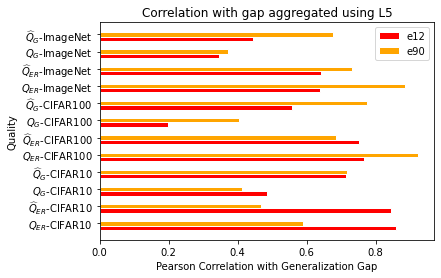

In [68]:
datasets = ['CIFAR10', 'CIFAR100','ImageNet16-120']
corr     = ['test', 'gap']
agg      = ['L2', 'L3', 'L5']

for l in agg:
    for c in corr:
        e12 = []
        e90 = []
        for d in datasets:
            e12.extend([results['erBE_'+l+'_' + c + '_'+ d + '_12'], 
                        results['erAE_'+l+'_' + c + '_'+ d + '_12'], 
                        results['mqBE_'+l+'_' + c + '_' + d + '_12'], 
                        results['mqAE_'+l+'_' + c + '_' + d + '_12']])

            e90.extend([results['erBE_'+l+'_' + c + '_'+ d + '_90'], 
                        results['erAE_'+l+'_' + c + '_'+ d + '_90'], 
                        results['mqBE_'+l+'_' + c + '_' + d + '_90'], 
                        results['mqAE_'+l+'_' + c + '_' + d + '_90']])
        #print(e12)
        #print(e90)

        barWidth = 0.25
        r1 = np.arange(len(e12))
        r2 = [x + barWidth for x in r1]

        plt.barh(r1, e12, color = 'red' , height = barWidth, edgecolor = 'white', label = 'e12')
        plt.barh(r2, e90, color = 'orange', height = barWidth, edgecolor = 'white', label = 'e90')
        plt.yticks([r + barWidth for r in range(len(e12))], ['${Q_{ER}}$-CIFAR10',  '${\widehat{Q}_{ER}}$-CIFAR10',  '${Q}_{G}$-CIFAR10',  '$\widehat{Q}_{G}$-CIFAR10',
                                                             '${Q_{ER}}$-CIFAR100', '${\widehat{Q}_{ER}}$-CIFAR100', '${Q}_{G}$-CIFAR100', '$\widehat{Q}_{G}$-CIFAR100',
                                                             '${Q_{ER}}$-ImageNet', '${\widehat{Q}_{ER}}$-ImageNet', '${Q}_{G}$-ImageNet', '$\widehat{Q}_{G}$-ImageNet'], rotation = 'horizontal', size = 10)
        plt.xticks(size = 10)
        if(c == 'test'):
            plt.xlabel("Pearson Correlation with Test Accuracy")
        else:
            plt.xlabel("Pearson Correlation with Generalization Gap")
        
        plt.ylabel("Quality")
        plt.title("Correlation with " + c + " aggregated using " + l)

        plt.legend()
        plt.show()
        plt.savefig(save_location + '90/' + title + '.PNG')
        plt.close()